# Big Data Algorithms
## List 2

In [1]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

### Task 1
In a single plot draw graphs of functions

Below are functions needed to simplify the code

In [2]:
def function_string(func, domain='x'):
    return f'{func}({domain})'

In [3]:
def enumerate_function_names(function_names):
    func_str = [f'${function_string(func_name)}$, ' for func_name in function_names[:-1]]
    return ''.join(func_str) + f'and ${function_string(function_names[-1])}$'

In [4]:
def plot_all_functions(function_names, function_list, color_list, domain, range_=(0, 10)):
    x_range = np.arange(range_[0], range_[1] + 1, 1)
    figure, axes = plt.subplots(1, 1, layout='constrained')
    axes.set(xlabel='x', ylabel=', '.join(function_names))
    for function_name, function_state, color in zip(function_names, function_list, color_list):
        axes.plot(x_range,
                  sp.lambdify(domain, function_state, 'numpy')(x_range),
                  label=f'${function_string(function_name)} = {sp.latex(function_state)}$',
                  color=color)
    axes.grid()
    axes.legend()
    axes.set_title(f'Plots for {enumerate_function_names(function_names)} for range $[{range_[0]}, {range_[1]}]$')

In [5]:
colors = ['maroon', 'blue', 'darkgreen']

<ul><li>$g(x) = x$, $h(x) = 100 \sqrt{x}$ for $x \in [0, 500]$</li></ul>

In [6]:
x = sp.symbols('x', integer=True)
g = x
h = 100 * sp.sqrt(x)

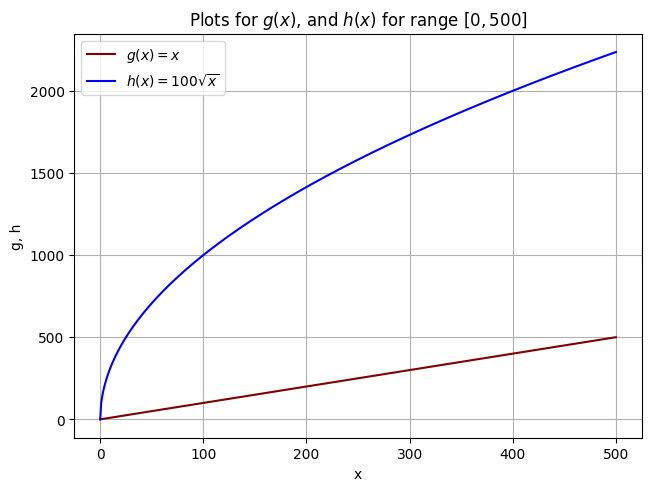

In [7]:
plot_all_functions(['g', 'h'], [g, h], colors, x, range_=(0, 500))

<ul><li>$g(x) = x$, $h(x) = 100 \sqrt{x}$ for $x \in [0, 10000000]$</li></ul>

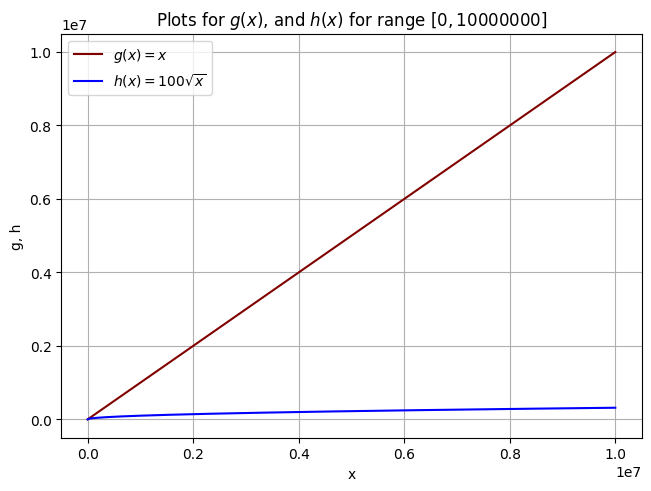

In [8]:
plot_all_functions(['g', 'h'], [g, h], colors, x, range_=(0, 10000000))

<ul><li>$g(x) = x$, $h(x) = \ln{x}$, $l(x) = \sqrt{x}$ for $x \in [0, 10]$</li></ul>

In [9]:
g = x
h = sp.ln(x)
l = sp.sqrt(x)

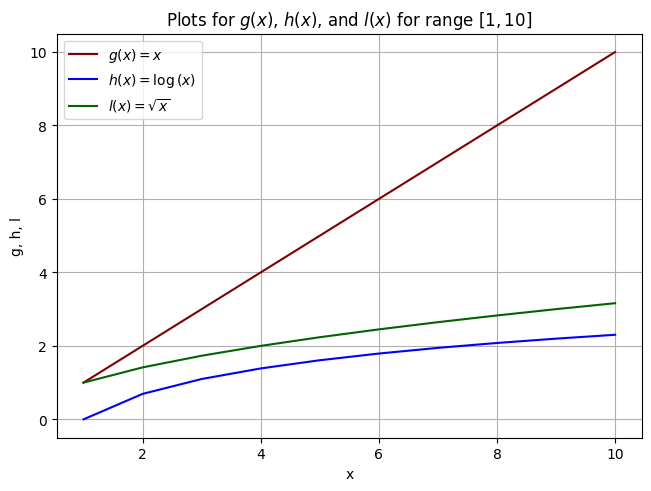

In [10]:
plot_all_functions(['g', 'h', 'l'], [g, h, l],
                   colors, x, range_=(1, 10))

<ul><li>$g(x) = x$, $h(x) = \ln{x}$, $l(x) = \sqrt{x}$ for $x \in [0, 200]$</li></ul>

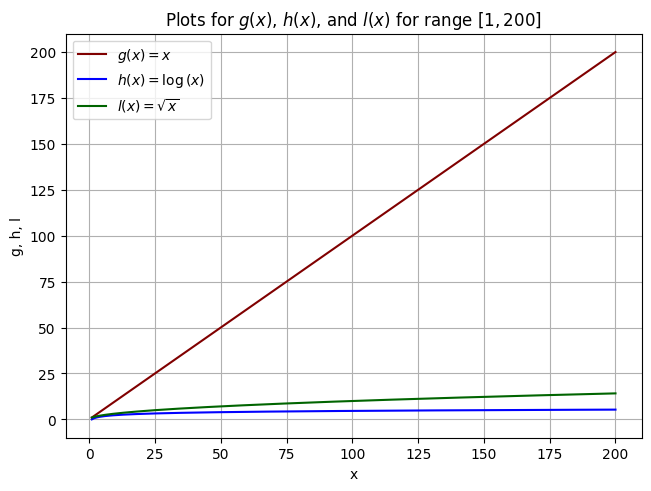

In [11]:
plot_all_functions(['g', 'h', 'l'], [g, h, l],
                   colors, x, range_=(1, 200))

<ul><li>$g(x) = x \sqrt{x}$, $h(x) = x \ln{x}$, $l(x) = x^2$ for $x \in [1, 50]$</li></ul>

In [12]:
g = x * sp.sqrt(x)
h = x * sp.ln(x)
l = x ** 2

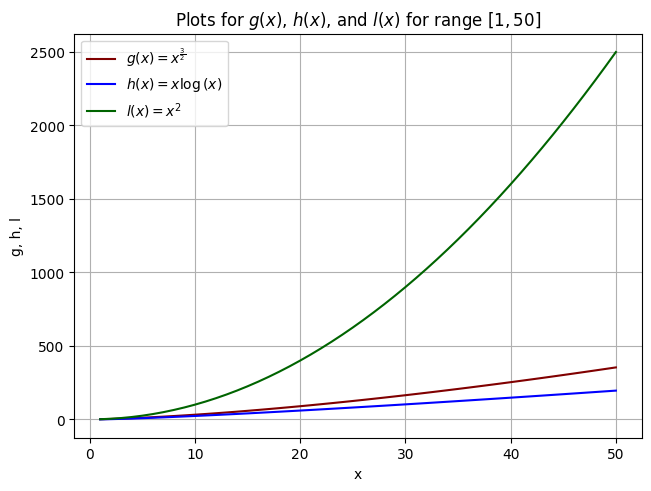

In [13]:
plot_all_functions(['g', 'h', 'l'], [g, h, l],
                   colors, x, range_=(1, 50))

<ul><li>$g(x) = \frac{x}{\ln{\ln{x}}}$, $h(x) = \frac{x}{\ln{x}}$ for $x \in [1, 2000]$</li></ul>

In [14]:
g = x / sp.ln(sp.ln(x))
h = x / sp.ln(x)

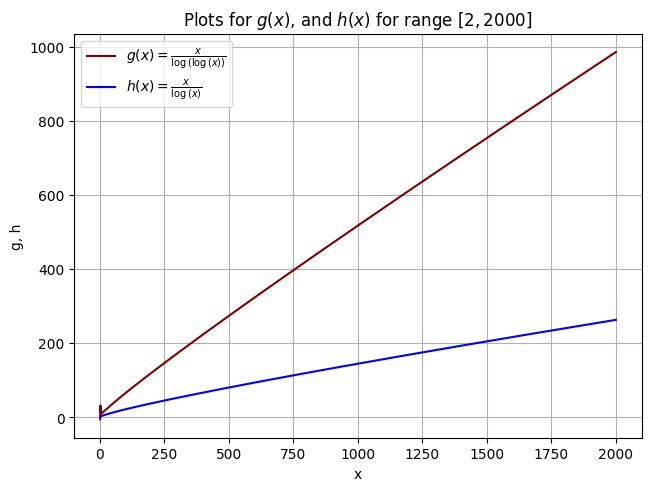

In [15]:
plot_all_functions(['g', 'h'], [g, h], colors, x, range_=(2, 2000))

<ul><li>$g(x) = \frac{\ln{x}}{\ln{\ln{x}}}$, $h(x) = \frac{\ln{\ln{x}}}{\ln{x}}$ for $x \in [1, 2000]$</li></ul>

In [16]:
g = sp.ln(x) / sp.ln(sp.ln(x))
h = sp.ln(sp.ln(x)) / sp.ln(x)

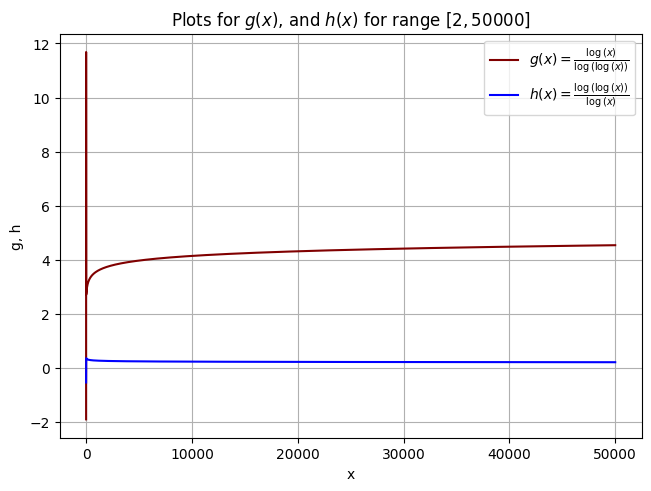

In [17]:
plot_all_functions(['g', 'h'], [g, h], colors, x, range_=(2, 50000))

## Task 2
We throw independently balls into n bins until all bins are non-empty. Let C be the
number of thrown balls.

In [29]:
import timeit
import itertools
import functools

In [19]:
def simulate_bins_and_balls_1(num_of_bins):
    histogram_data = {bin_: 0 for bin_ in range(1, num_of_bins + 1)}
    upper_bound = num_of_bins + 1
    while 0 in histogram_data.values():
        histogram_data[np.random.randint(1, upper_bound)] += 1
    return np.array(list(histogram_data.values())).sum()

In [20]:
def simulate_bins_and_balls_2(num_of_bins):
    occurences = set()
    counter = 0
    upper_bound = num_of_bins + 1
    while len(occurences) < num_of_bins:
        occurences.add(np.random.randint(1, upper_bound))
        counter += 1
    return counter

In [21]:
def simulate_bins_and_balls_3(num_of_bins):
    occurences = set()
    upper_bound = num_of_bins + 1
    for counter in itertools.count(start=1, step=1):
        occurences.add(np.random.randint(1, upper_bound))
        if len(occurences) == num_of_bins:
            return counter

In [22]:
number_of_bins = 10000

In [23]:
%%timeit
simulate_bins_and_balls_1(number_of_bins)

The slowest run took 10.90 times longer than the fastest. This could mean that an intermediate result is being cached.
1.32 s ± 758 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%%timeit
simulate_bins_and_balls_2(number_of_bins)

264 ms ± 38.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%%timeit
simulate_bins_and_balls_3(number_of_bins)

278 ms ± 40.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


seems like functions 2 and 3 are very similar in efficiency

<ul><li>Use numerical experiments to find an approximation of PDF for C (i.e. a histogram). Present results for n = 10, n = 100 and n = 1000</li></ul>

In [65]:
def repeat_experiments(num_of_trials, num_of_bins):
    return np.fromiter((simulate_bins_and_balls_3(number_of_bins) for _ in range(num_of_trials)), int)

In [62]:
number_of_trials = 20
number_of_bins = 1000

In [66]:
repeat_experiments(number_of_trials, number_of_bins)

array([ 9004,  8148,  7358,  6311,  7146,  7338,  6323,  8191,  6723,
        6469,  6457, 12701,  8032,  7062,  7164,  7659,  8018,  6131,
        9924,  6290])

In [81]:
number_of_trials = 5000
number_of_bins = 10
result_1 = repeat_experiments(number_of_trials, number_of_bins)

In [82]:
number_of_trials = 5000
number_of_bins = 100
result_2 = repeat_experiments(number_of_trials, number_of_bins)

In [ ]:
number_of_trials = 5000
number_of_bins = 1000
result_3 = repeat_experiments(number_of_trials, number_of_bins)

In [ ]:
figure, axes = plt.subplots(3, 1, layout='constrained', figsize=(5,12))

colors = ['maroon', 'darkgreen', 'darkblue']
for index, (result, num_bins) in enumerate(zip([result_1, result_2, result_3], [10, 100, 1000])):
    axes[index].hist(result, bins=100, color=colors[index], alpha=0.7, ec='black')
    title = f'Histogram for n = {num_bins}, {number_of_trials} trials'
    axes[index].set(title=title)